<a href="https://colab.research.google.com/github/Tavleen1203/FraudTransactionAnalysis/blob/main/Accredian_Task_TavleenKaur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FRAUD DETECTION IN TRANSACTIONS**

## **DATA PREPROCESSING**

**DATA LOADING**

In [2]:

import pandas as pd

file_path = '/content/Fraud.csv'
df = pd.read_csv(file_path)

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**HANDLING MISSING VALUES AND DUPLICATES**

In [ ]:

missing_values = df.isnull().sum()

missing_values[missing_values > 0]


,0


In [ ]:
import pandas as pd
import numpy as np

numerical_columns = ['newbalanceDest', 'oldbalanceDest', 'newbalanceOrig', 'oldbalanceOrg', 'amount']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

df['isFraud'].fillna(0, inplace=True)
df['isFlaggedFraud'].fillna(0, inplace=True)

df['nameOrig'].fillna('0', inplace=True)
df['nameDest'].fillna('0', inplace=True)

df['isFraud'] = df['isFraud'].astype(int)
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(int)

print(df.head())


<ipython-input-3-8f769156b766>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-3-8f769156b766>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


<ipython-input-3-8f769156b766>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nameDest'].fillna('0', inplace=True)


In [ ]:
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


**CLASS BALANCING AND OUTLIER CORRECTION**

In [ ]:
df.describe()

fraud_distribution = df['isFraud'].value_counts()

fraud_distribution


,count
isFraud,
0,6354407
1,8213


In [ ]:
df.dtypes

df['step'] = df['step'].astype(int)

df['amount'] = df['amount'].astype(float)

df.dtypes


,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


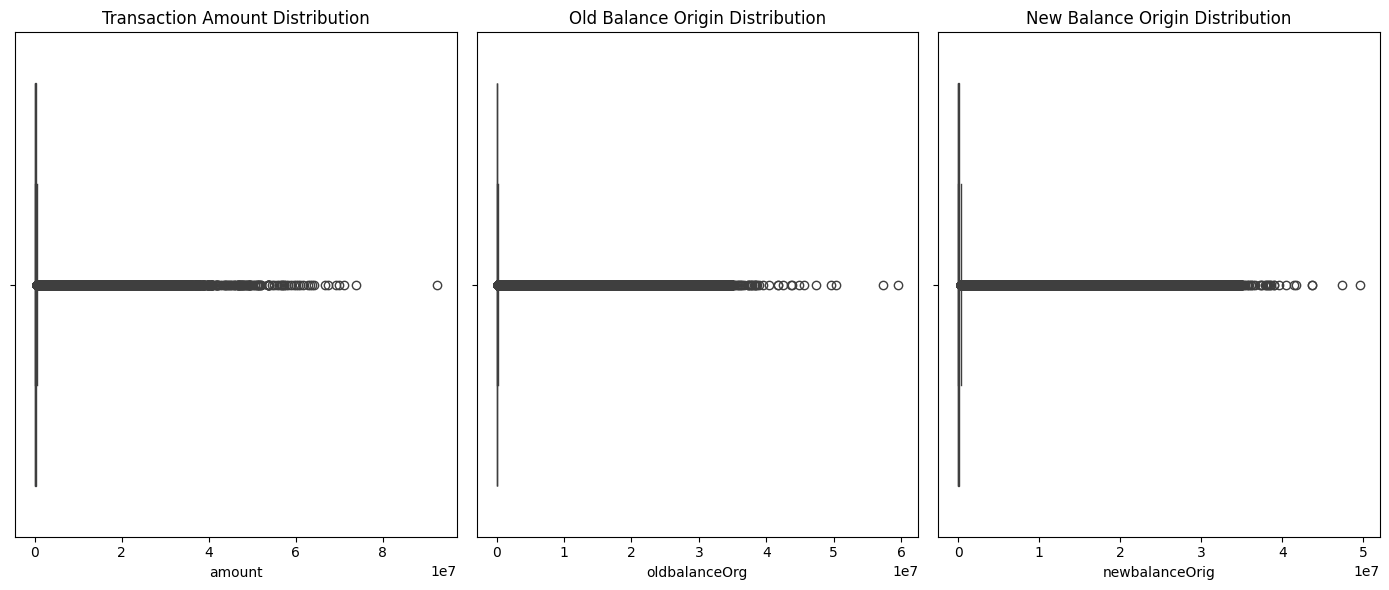

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['amount'])
plt.title('Transaction Amount Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['oldbalanceOrg'])
plt.title('Old Balance Origin Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['newbalanceOrig'])
plt.title('New Balance Origin Distribution')

plt.tight_layout()
plt.show()


In [ ]:
!pip install imbalanced-learn


In [ ]:
df.dtypes


,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


**ENCODING OF DATA**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X = df.drop(columns=['isFraud'])
y = df['isFraud']

X['type'] = label_encoder.fit_transform(X['type'])
X['nameOrig'] = label_encoder.fit_transform(X['nameOrig'])
X['nameDest'] = label_encoder.fit_transform(X['nameDest'])

X.dtypes



,0
step,int64
type,int64
amount,float64
nameOrig,int64
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,int64
oldbalanceDest,float64
newbalanceDest,float64
isFlaggedFraud,int64


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original class distribution in training set:\n{y_train.value_counts()}")
print(f"Resampled class distribution in training set:\n{y_train_resampled.value_counts()}")



Original class distribution in training set:
isFraud
0    5083503
1       6593
Name: count, dtype: int64
Resampled class distribution in training set:
isFraud
0    5083503
1    5083503
Name: count, dtype: int64


## **MODEL DEVELOPMENT**

**CLASSICAL APPROACH 1 : LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

logreg_model = LogisticRegression(random_state=42, max_iter=1000)

logreg_model.fit(X_train_resampled, y_train_resampled)

y_pred_logreg = logreg_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"Logistic Regression ROC-AUC: {roc_auc_logreg}")
print("Logistic Regression Classification Report:")
print(classification_rep_logreg)


Logistic Regression Accuracy: 0.9491805262611943
Logistic Regression ROC-AUC: 0.9421917755363869
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270904
           1       0.02      0.94      0.04      1620

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



**CLASSICAL APPROACH 2 : DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_resampled, y_train_resampled)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")
print(f"Decision Tree Classifier ROC-AUC: {roc_auc_dt}")
print("Decision Tree Classification Report:")
print(classification_rep_dt)


Decision Tree Classifier Accuracy: 0.9991984434085329
Decision Tree Classifier ROC-AUC: 0.9789460576832139
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.62      0.96      0.75      1620

    accuracy                           1.00   1272524
   macro avg       0.81      0.98      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



**ENSEMBLE APPROACH : RANDOM FOREST + XGBOOST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import DMatrix, train as xgb_train
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

dtrain = DMatrix(X_train_resampled, label=y_train_resampled)
dtest = DMatrix(X_test, label=y_test)

xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 6,
    "eta": 0.1,
    "seed": 42
}

xgb_model = xgb_train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=10,
    evals=[(dtest, "eval")],
    early_stopping_rounds=5,
    verbose_eval=False
)

y_pred_xgb = (xgb_model.predict(dtest) > 0.5).astype(int)

y_pred_ensemble = (y_pred_rf + y_pred_xgb) // 2

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_ensemble)
classification_rep_ensemble = classification_report(y_test, y_pred_ensemble)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model ROC-AUC: {roc_auc_ensemble}")
print("Ensemble Model Classification Report:")
print(classification_rep_ensemble)


Ensemble Model Accuracy: 0.9992078734860796
Ensemble Model ROC-AUC: 0.9777177845139181
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.62      0.96      0.75      1620

    accuracy                           1.00   1272524
   macro avg       0.81      0.98      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



**UNSUPERVISED APPROACH : ISOLATION FOREST**

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(random_state=42)

iso_forest.fit(X_train_resampled)

y_pred_iso = iso_forest.predict(X_test)

y_pred_iso = [1 if pred == -1 else 0 for pred in y_pred_iso]

accuracy_iso = accuracy_score(y_test, y_pred_iso)
roc_auc_iso = roc_auc_score(y_test, y_pred_iso)
classification_rep_iso = classification_report(y_test, y_pred_iso)

print(f"Isolation Forest Accuracy: {accuracy_iso}")
print(f"Isolation Forest ROC-AUC: {roc_auc_iso}")
print("Isolation Forest Classification Report:")
print(classification_rep_iso)


Isolation Forest Accuracy: 0.8435675869374566
Isolation Forest ROC-AUC: 0.47965566534034326
Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.92   1270904
           1       0.00      0.11      0.00      1620

    accuracy                           0.84   1272524
   macro avg       0.50      0.48      0.46   1272524
weighted avg       1.00      0.84      0.91   1272524



**RESULT ANALYSIS**

In [21]:
results = {
    "Logistic Regression": {"Accuracy": accuracy_logreg, "ROC-AUC": roc_auc_logreg},
    "Decision Tree": {"Accuracy": accuracy_dt, "ROC-AUC": roc_auc_dt},
    "Ensemble (Random Forest + XGBoost)": {"Accuracy": accuracy_ensemble, "ROC-AUC": roc_auc_ensemble},
    "Isolation Forest": {"Accuracy": accuracy_iso, "ROC-AUC": roc_auc_iso}
}

results_df = pd.DataFrame(results).T
print(results_df)


                                    Accuracy   ROC-AUC
Logistic Regression                 0.949181  0.942192
Decision Tree                       0.999198  0.978946
Ensemble (Random Forest + XGBoost)  0.999208  0.977718
Isolation Forest                    0.843568  0.479656


<ipython-input-22-fda8d715d964>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="Accuracy", data=results_df, ax=axes[0], palette="Blues_d")
<ipython-input-22-fda8d715d964>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(results_df.index, rotation=45)
<ipython-input-22-fda8d715d964>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="ROC-AUC", data=results_df, ax=axes[1], palette="Greens_d")
<ipython-input-22-fda8d715d964>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

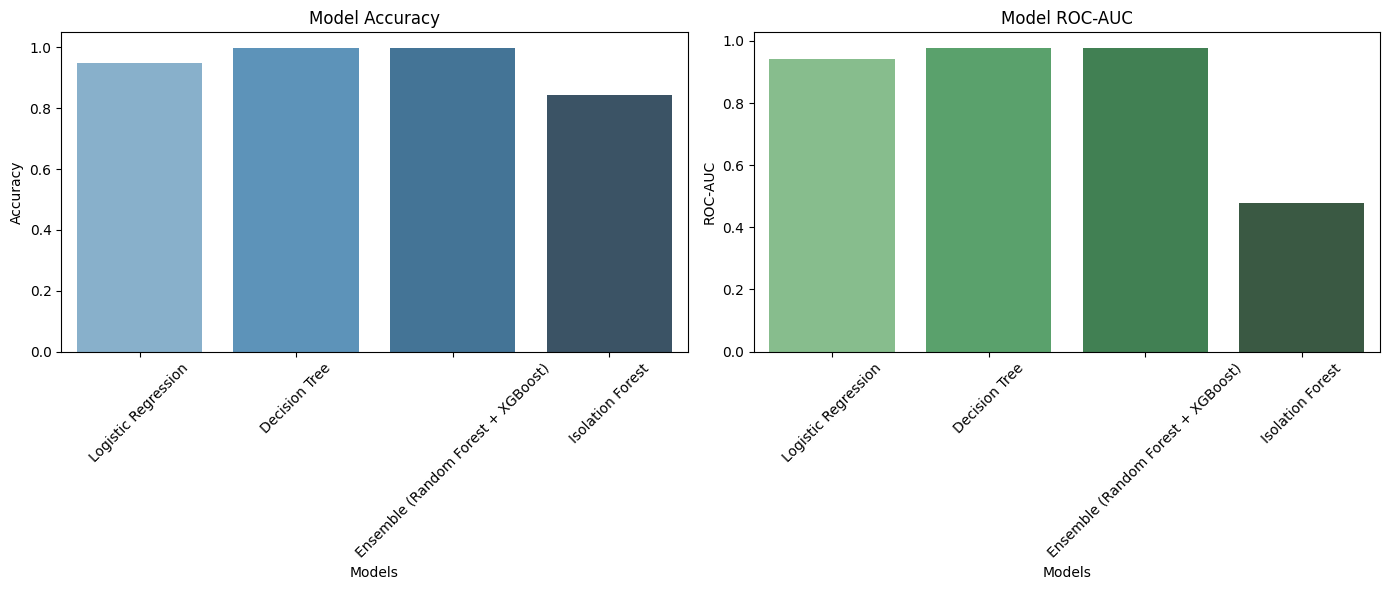

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(results).T

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=results_df.index, y="Accuracy", data=results_df, ax=axes[0], palette="Blues_d")
axes[0].set_title("Model Accuracy")
axes[0].set_ylabel("Accuracy")
axes[0].set_xlabel("Models")
axes[0].set_xticklabels(results_df.index, rotation=45)

sns.barplot(x=results_df.index, y="ROC-AUC", data=results_df, ax=axes[1], palette="Greens_d")
axes[1].set_title("Model ROC-AUC")
axes[1].set_ylabel("ROC-AUC")
axes[1].set_xlabel("Models")
axes[1].set_xticklabels(results_df.index, rotation=45)

plt.tight_layout()
plt.show()
